In [6]:
import pandas as pd
import numpy as np

# missing value viz
import missingno as msno

## All Dog Descriptions

In [2]:
df = pd.read_csv('data/descriptions.csv')

In [4]:
df.head()

,index,id,org_id,url,type.x,species,breed_primary,breed_secondary,breed_mixed,breed_unknown,...,status,posted,contact_city,contact_state,contact_zip,contact_country,stateQ,accessed,type.y,description
0,0,46042150,NV163,https://www.petfinder.com/dog/harley-46042150/...,Dog,Dog,American Staffordshire Terrier,Mixed Breed,True,False,...,adoptable,2019-09-20T16:37:59+0000,Las Vegas,NV,89147,US,89009,2019-09-20,Dog,Harley is not sure how he wound up at shelter ...
1,1,46042002,NV163,https://www.petfinder.com/dog/biggie-46042002/...,Dog,Dog,Pit Bull Terrier,Mixed Breed,True,False,...,adoptable,2019-09-20T16:24:57+0000,Las Vegas,NV,89147,US,89009,2019-09-20,Dog,6 year old Biggie has lost his home and really...
2,2,46040898,NV99,https://www.petfinder.com/dog/ziggy-46040898/n...,Dog,Dog,Shepherd,NaN,False,False,...,adoptable,2019-09-20T14:10:11+0000,Mesquite,NV,89027,US,89009,2019-09-20,Dog,Approx 2 years old.\n Did I catch your eye? I ...
3,3,46039877,NV202,https://www.petfinder.com/dog/gypsy-46039877/n...,Dog,Dog,German Shepherd Dog,NaN,False,False,...,adoptable,2019-09-20T10:08:22+0000,Pahrump,NV,89048,US,89009,2019-09-20,Dog,NaN
4,4,46039306,NV184,https://www.petfinder.com/dog/theo-46039306/nv...,Dog,Dog,Dachshund,NaN,False,False,...,adoptable,2019-09-20T06:48:30+0000,Henderson,NV,89052,US,89009,2019-09-20,Dog,Theo is a friendly dachshund mix who gets alon...


In [3]:
df.shape

(58180, 36)

In [5]:
df.isnull().sum()

index                  0
id                     0
org_id                 0
url                    0
type.x                 0
species                0
breed_primary          0
breed_secondary    37359
breed_mixed            0
breed_unknown          0
color_primary      32046
color_secondary    46121
color_tertiary     56963
age                    0
sex                    0
size                   0
coat               30995
fixed                  0
house_trained          0
declawed           58180
special_needs          0
shots_current          0
env_children       30153
env_dogs           23511
env_cats           38828
name                   0
status                 0
posted                 0
contact_city           0
contact_state          0
contact_zip           12
contact_country        0
stateQ                 0
accessed              33
type.y               640
description         8705
dtype: int64

## Missing Values

<AxesSubplot:>

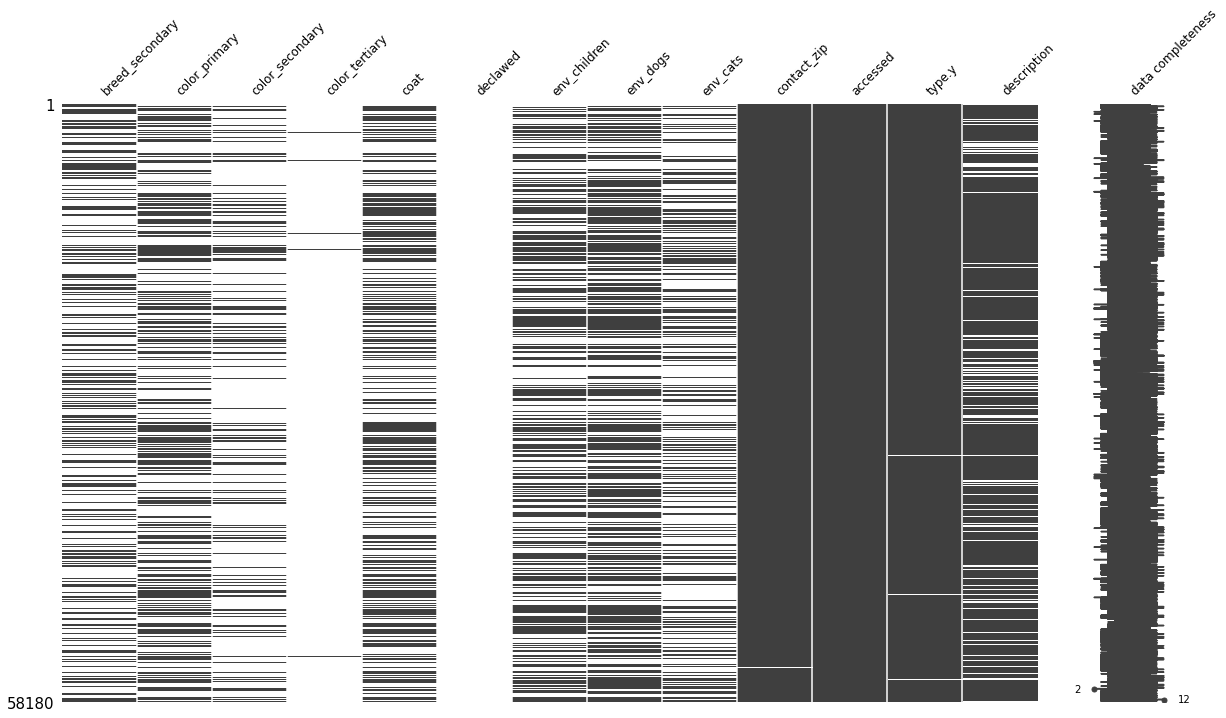

In [7]:
# Visualizing missing values
missingValueColumns = df.columns[df.isnull().any()].tolist()
msno.matrix(df[missingValueColumns], width_ratios = (10, 1), \
           figsize=(20,11), fontsize = 12, sparkline=True, labels = True)